TransferFunctionContinuous(
array([2.]),
array([1., 2.]),
dt: None
)

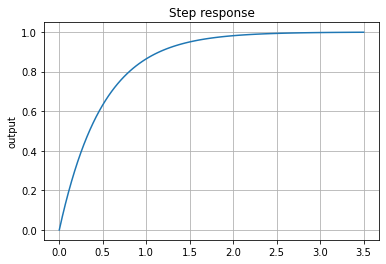

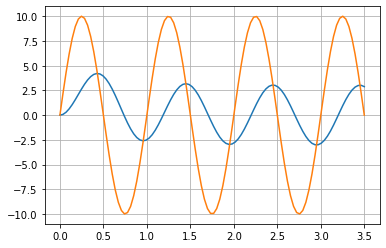

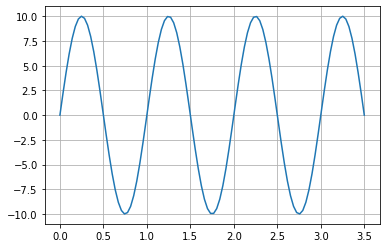

In [68]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import sympy as sym
## use scipy signal to simulate the input output response
t=np.linspace(0, 10, 1000, endpoint=True)#
num=[2]
den=[1,2]
sys=sig.lti(num,den)
display(sys)
t,y=sig.step(sys)
ft = 10*np.sin(2*np.pi*t)
_,y1,_ = sig.lsim(sys,ft,T=t)
## Start Plot
#################################
## Step response plot
# fig1=plt.figure()
plt.figure()
plt.plot(t,y) 
plt.title('Step response')
plt.ylabel('output')
plt.grid(True)
##############################################
## Bode response
# plt.figure()
# plt.plot(t,y,label='Output') 
# plt.grid(True)
##############################################
## Root locus response
# plt.figure()
# plt.plot(t,y,label='Output') 
# plt.grid(True)
##############################################
## simulate output with input
plt.figure()
plt.plot(t,y1,label='Output') 
plt.plot(t,ft,label='Input') 
plt.grid(True)
#######################################

plt.figure()
plt.plot(t,ft,label='Input') 
plt.grid(True)
plt.show()

In [31]:
# np.arange(0,10,0.01,endpoint=True)
start=0
stop=1
num=100
step=1e-2
T1=np.linspace(start, stop, num+1)#, endpoint=True
display(T1)
T2=np.arange(start,stop,step)
display(T2)
# np.linspace()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

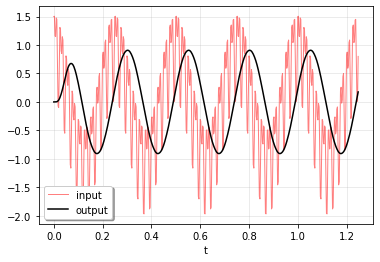

In [36]:
# We'll use lsim to simulate an analog Bessel filter applied to a signal.
from scipy.signal import bessel, lsim
import numpy as np
import matplotlib.pyplot as plt
# Create a low-pass Bessel filter with a cutoff of 12 Hz.

b, a = bessel(N=5, Wn=2*np.pi*12, btype='lowpass', analog=True)
# Generate data to which the filter is applied.

t = np.linspace(0, 1.25, 500, endpoint=False)
# The input signal is the sum of three sinusoidal curves, with frequencies 4 Hz, 40 Hz, and 80 Hz. The filter should mostly eliminate the 40 Hz and 80 Hz components, leaving just the 4 Hz signal.

u = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) + 0.5*np.cos(2*np.pi*80*t))
# Simulate the filter with lsim.

tout, yout, xout = lsim((b, a), U=u, T=t)
# Plot the result.

plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()


(array([[0., 0., 1.]]), array([1., 0., 0.]))

array([0., 0., 1.])

array([1., 0., 0.])

TransferFunction(array([1.]), array([1., 0., 0.]))

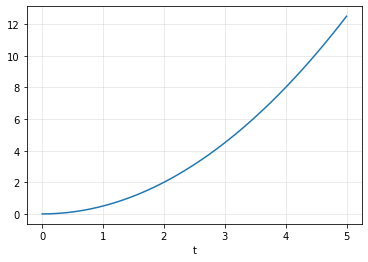

In [67]:
# In a second example, we simulate a double integrator y'' = u, with a constant input u = 1. We'll use the state space representation of the integrator.

import scipy.signal as sig
import control as ct
A = np.array([[0.0, 1.0], [0.0, 0.0]])
B = np.array([[0.0], [1.0]])
C = np.array([[1.0, 0.0]])
D = 0.0
system = sig.lti(A, B, C, D)
display(sig.ss2tf(A,B,C,D))
num,den=sig.ss2tf(A,B,C,D)
G=ct.tf(num[0,::],den[0::])
display(num[0,::].T,den[0::])
display(G)
# t and u define the time and input signal for the system to be simulated.

t = np.linspace(0, 5, num=50)
u = np.ones_like(t)
# Compute the simulation, and then plot y. As expected, the plot shows the curve y = 0.5*t**2.

tout, y, x = lsim(system, u, t)
plt.plot(t, y)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()